Fitting amplitudes using scipy wrapper library [lmfit](https://lmfit.github.io/lmfit-py/)

In [157]:
from lmfit import Parameters

paramsR = Parameters()
paramsL = Parameters()
paramsC = Parameters()

# paramsR.add('R_r',996.7, min=950, max=1500)
# paramsR.add('R',2000,min=1.5e03, max=3e03)
# paramsR.add('L',4.741e-02, min=3.0e-02, max=5.5e-02)
# paramsR.add('C',1.46e-09, min=1e-09, max=2e-09)
# paramsR.add('V_0',2.4,min=0.0,max=3.0)

paramsR.add('R_r',1000, min=0)
paramsR.add('R',1170,min=0)
paramsR.add('L',4.741e-02, min=0)
paramsR.add('C',1.46e-09, min=0)
paramsR.add('V_0',2.4,min=0.0)

paramsL.add('R',min=1.5e03, max=3e03)
paramsL.add('L',4.741e-02, min=3.0e-02, max=5.5e-02)
paramsL.add('C',1.46e-09, min=1e-09, max=2e-09)
paramsL.add('V_0',1.5,min=0.0,max=3.0)

paramsC.add('R',min=1.5e03, max=3e03)
paramsC.add('L',4.741e-02, min=3.0e-02, max=5.5e-02)
paramsC.add('C',1.46e-09, min=1e-09, max=2e-09)
paramsC.add('V_0',1.5,min=0.0,max=3.0)


We estimate the uncertainty on the amplitudes measurements as the standard deviation of a sample population obtained with a squared wave at f = 19kHz(#TODO rimisura a freequenza piu bassa)

In [158]:
import numpy as np

folder = 'data/actual data/Voltage-time/'
file_name = 'freq19kHz.csv'
data_file = folder + file_name
swAmpGen  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (1), unpack = True)
swAmpPositive = []
for x in range(len(swAmpGen)):
    if (swAmpGen[x] > 0.0):
        swAmpPositive.append(swAmpGen[x])
swAmpNegative = []
for x in range(len(swAmpGen)):
    if (swAmpGen[x] < 0.0):
        swAmpNegative.append(swAmpGen[x])

In [159]:
from statistics import stdev
errorePos = stdev(swAmpPositive)
erroreNeg = stdev(swAmpNegative)
print("Deviazione standard sulle ampiezze positive della tensione del generatore: ",'{:.4f}'.format(errorePos))
print("Deviazione standard sulle ampiezze negative della tensione del generatore: ",'{:.4f}'.format(erroreNeg))

Deviazione standard sulle ampiezze positive della tensione del generatore:  0.0506
Deviazione standard sulle ampiezze negative della tensione del generatore:  0.0477


Now importing the experimental data

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

file_folder = 'data/actual data/Frequency response/'
file_name = 'amplitudes1.csv'
data_file = file_folder + file_name
x,ampGen,ampR,ampL,ampC  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0,1,2,3,4), unpack = True)

We now assume the previously calculated value to be the error on all the measurements

In [161]:
errors = []
for i in range(len(ampGen)):
   errors.append(errorePos)

weights = np.reciprocal(errors)

Now defining the models our data will be fitted to:

In [162]:
def R_amp_model(x, R_r , R, L, C, V_0):
    num = R_r * V_0
    den = np.sqrt( R**2 + (2*np.pi*x* L - 1/(2*np.pi*x* C))**2)
    return num / den
def L_amp_model(x, R, L, C, V_0):
    num = 2*np.pi*x *L * V_0
    den = np.sqrt( R**2 + (2*np.pi*x *L - 1/(2*np.pi*x *C))**2)
    return num / den
def C_amp_model(x, R, L, C, V_0):
    num = V_0 / (2*np.pi*x *C)
    den = np.sqrt( R**2 + (2*np.pi*x *L - 1/(2*np.pi*x *C))**2)
    return num / den

Rmodel = Model(R_amp_model)
Lmodel = Model(L_amp_model)
Cmodel = Model(C_amp_model)


Now performing the fits:

In [163]:
resultR = Rmodel.fit(ampR,x=x,params=paramsR,weights=weights)
resultL = Lmodel.fit(ampL,x=x,params=paramsL,weights=weights)
resultC = Cmodel.fit(ampC,x=x,params=paramsC,weights=weights)

...And printing out the fit results

R

[[Model]]
    Model(R_amp_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 986
    # variables        = 5
    chi-square         = 23.5589709
    reduced chi-square = 0.02401526
    Akaike info crit   = -3671.87158
    Bayesian info crit = -3647.40330
##  Warning: uncertainties could not be estimated:
    C:    at initial value
    C:    at boundary
[[Variables]]
    R_r:  830.390201 (init = 1000)
    R:    2111.80860 (init = 1170)
    L:    0.04896271 (init = 0.04741)
    C:    1.4600e-09 (init = 1.46e-09)
    V_0:  3.12465798 (init = 2.4)
L

[[Model]]
    Model(L_amp_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 986
    # variables        = 4
    chi-square         = 1249.04401
    reduced chi-square = 1.27193891
    Akaike info crit   = 241.166709
    Bayesian info crit = 260.741334
[[Variables]]
    R:    1889.10744 +/- 169.623008 (8.98%) (init = 1500)

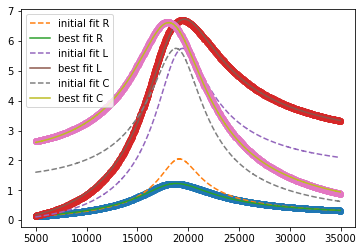

In [164]:
print('R\n')
print(resultR.fit_report())
print('L\n')
print(resultL.fit_report())
print('C\n')
print(resultC.fit_report())
plt.plot(x, ampR, 'o')
plt.plot(x, resultR.init_fit, '--', label='initial fit R')
plt.plot(x, resultR.best_fit, '-', label='best fit R')
plt.plot(x, ampL, 'o')
plt.plot(x, resultL.init_fit, '--', label='initial fit L')
plt.plot(x, resultL.best_fit, '-', label='best fit L')
plt.plot(x, ampC, 'o')
plt.plot(x, resultC.init_fit, '--', label='initial fit C')
plt.plot(x, resultC.best_fit, '-', label='best fit C')
plt.legend()

plt.savefig('figs/amplitudes.pdf')
plt.show()